In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

ruta_resultados = "C:/Users/inesm/OneDrive/Documentos/tfg/ModeloFriedkin/resultados_2025-12-21_164445/resultados.csv"

df = pd.read_csv(ruta_resultados)
df.describe()

,replica,fracTrolls,lambda,rango_final,std_final,median_final,mean_final,prop_neg,median_norm,NDI,resid,t_conv,rho_lambdaW,nSCC
count,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,1.620000e+04,16200.000000,16200.000000,16200.000000
mean,25.500000,0.150000,0.475000,1.474638,0.437079,0.293324,0.146056,0.148019,0.334975,116.678496,5.763819e-07,17.335556,0.409499,7.286667
std,14.431315,0.102473,0.256182,0.495485,0.176657,0.271597,0.306957,0.290185,0.256728,78.275815,2.613380e-07,14.361016,0.230957,8.824736
min,1.000000,0.000000,0.100000,0.155185,0.038954,-0.680927,-0.713307,0.000000,-0.589240,0.748915,2.161856e-08,3.000000,0.035411,1.000000
25%,13.000000,0.060000,0.250000,1.185573,0.329186,0.173494,-0.043604,0.000000,0.237462,53.237976,3.649480e-07,8.000000,0.221168,1.000000
50%,25.500000,0.150000,0.475000,1.677645,0.455293,0.390712,0.161716,0.008772,0.449910,108.876295,5.975784e-07,12.000000,0.398109,2.000000
75%,38.000000,0.240000,0.700000,1.866776,0.575805,0.496942,0.398306,0.105691,0.513974,172.458240,8.025976e-07,22.000000,0.592817,16.000000
max,50.000000,0.300000,0.850000,1.989798,0.741254,0.576039,0.575474,1.000000,0.576039,329.255073,9.999617e-07,80.000000,0.850000,32.000000


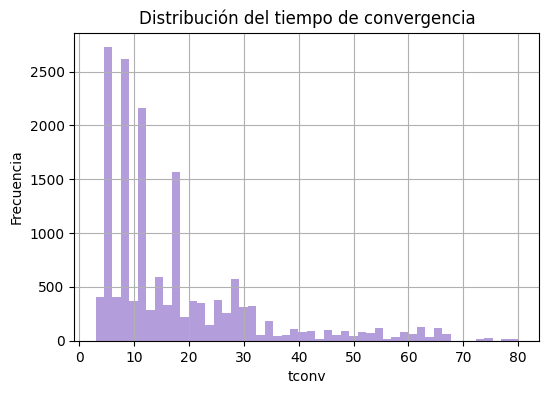

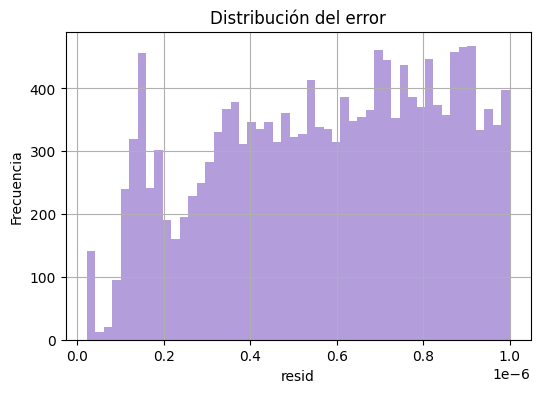

In [25]:
#Figuras de histogramas para tiempo de convergencia y error final

plt.figure(figsize=(6,4))
plt.hist(df["t_conv"], bins=50, color='#B39DDB')
plt.xlabel("tconv")
plt.ylabel("Frecuencia")
plt.title("Distribución del tiempo de convergencia")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df["resid"], bins=50, color='#B39DDB')
plt.xlabel("resid")
plt.ylabel("Frecuencia")
plt.title("Distribución del error")
plt.grid(True)
plt.show()


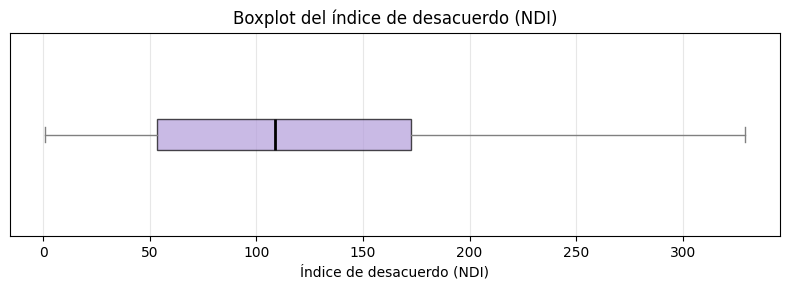

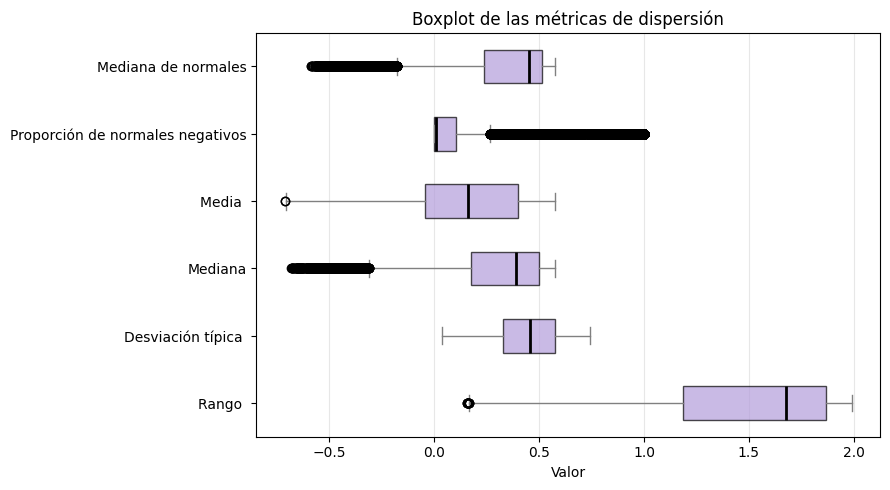

In [27]:
# Lista de columnas que quieres graficar
variables_graficar = [
    "rango_final", "std_final", "median_final", "mean_final",
    "prop_neg", "median_norm"
]

plt.figure(figsize=(8, 3))

plt.boxplot(
    df["NDI"],
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='#B39DDB', alpha=0.7),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray')
)

plt.xlabel("Índice de desacuerdo (NDI)")
plt.title("Boxplot del índice de desacuerdo (NDI)")
plt.yticks([])  
plt.grid(axis='x', alpha=0.3)

labels = [
    "Rango ",
    "Desviación típica ",
    "Mediana",
    "Media ",
    "Proporción de normales negativos",
    "Mediana de normales",
]
plt.tight_layout()
plt.show()
plt.figure(figsize=(9, 5))

plt.boxplot(
    df[variables_graficar],
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='#B39DDB', alpha=0.7),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray')
)

plt.yticks(
    ticks=range(1, len(labels) + 1),
    labels=labels
)
plt.xlabel("Valor")
plt.title("Boxplot de las métricas de dispersión")
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()



tablas

In [34]:
metricas_clave = ['rango_final', 'std_final', 'median_final', 'mean_final', 'prop_neg',
       'median_norm', 'NDI', 't_conv', 'rho_lambdaW', 'nSCC']

In [45]:
tabla = df.groupby("regimen", observed=True)[metricas_clave].agg(["median", "std"]).round(3)
tabla.reindex(["desconectada", "umbral", "fuerte"])

rango_final        std_final        median_final         \
                  median    std    median    std       median    std   
regimen                                                                
desconectada       1.752  0.480     0.493  0.178        0.412  0.274   
umbral             1.672  0.493     0.448  0.176        0.382  0.271   
fuerte             1.579  0.502     0.433  0.175        0.379  0.268   

             mean_final        prop_neg        median_norm             NDI  \
                 median    std   median    std      median    std   median   
regimen                                                                      
desconectada      0.171  0.300    0.019  0.259       0.477  0.250  107.587   
umbral            0.161  0.308    0.010  0.289       0.448  0.257  109.384   
fuerte            0.151  0.312    0.000  0.319       0.421  0.260  109.849   

                     t_conv         rho_lambdaW          nSCC         
                 std median     std      median    std median    std  
regimen                                                               
desconectada  73.113   13.0  16.212       0.398  0.238   19.0  5.233  
umbral        78.651   12.0  13.597       0.398  0.229    2.0  0.864  
fuerte        82.380   11.0  12.871       0.397  0.226    1.0  0.000

In [49]:
tabla = df.groupby("loc")[metricas_clave].agg(["median", "std"]).round(3)
tabla.reindex(["bajo_pr", "medio_pr", "alto_pr"])

rango_final        std_final        median_final        mean_final  \
              median    std    median    std       median    std     median   
loc                                                                           
bajo_pr        1.730  0.487     0.503  0.181        0.441  0.186      0.227   
medio_pr       1.675  0.492     0.451  0.173        0.372  0.265      0.150   
alto_pr        1.594  0.501     0.411  0.171        0.313  0.321      0.106   

                prop_neg        median_norm             NDI         t_conv  \
            std   median    std      median    std   median     std median   
loc                                                                          
bajo_pr   0.251    0.000  0.190       0.493  0.174  114.621  70.842   12.0   
medio_pr  0.304    0.011  0.288       0.436  0.248  109.133  80.192   12.0   
alto_pr   0.345    0.035  0.346       0.385  0.305  101.583  83.205   12.0   

                 rho_lambdaW          nSCC         
             std      median    std median    std  
loc                                                
bajo_pr   17.106       0.413  0.241    2.0  8.825  
medio_pr  14.125       0.400  0.230    2.0  8.825  
alto_pr   10.812       0.361  0.215    2.0  8.825

In [44]:
df.groupby("lambda")[metricas_clave].agg(["median", "std"]).round(3)

rango_final        std_final        median_final        mean_final  \
            median    std    median    std       median    std     median   
lambda                                                                      
0.10         1.946  0.388     0.583  0.166        0.487  0.047      0.302   
0.25         1.873  0.407     0.557  0.165        0.449  0.086      0.273   
0.40         1.781  0.422     0.529  0.162        0.400  0.131      0.223   
0.55         1.651  0.433     0.489  0.156        0.334  0.187      0.134   
0.70         1.443  0.439     0.405  0.147        0.202  0.263      0.022   
0.85         1.052  0.425     0.301  0.130       -0.072  0.372     -0.187   

              prop_neg        median_norm             NDI         t_conv  \
          std   median    std      median    std   median     std median   
lambda                                                                     
0.10    0.171    0.000  0.005       0.510  0.016  193.413  90.134    5.0   
0.25    0.192    0.000  0.016       0.496  0.050  171.765  79.039    8.0   
0.40    0.220    0.005  0.045       0.456  0.095  149.195  67.496   12.0   
0.55    0.259    0.022  0.115       0.378  0.154  119.862  54.765   17.0   
0.70    0.314    0.082  0.291       0.237  0.236   90.645  41.302   25.0   
0.85    0.396    0.593  0.433      -0.036  0.354   46.293  27.190   40.0   

               rho_lambdaW          nSCC         
           std      median    std median    std  
lambda                                           
0.10     0.377       0.089  0.013    2.0  8.826  
0.25     0.843       0.222  0.031    2.0  8.826  
0.40     1.628       0.357  0.050    2.0  8.826  
0.55     3.133       0.490  0.069    2.0  8.826  
0.70     6.556       0.620  0.088    2.0  8.826  
0.85    17.296       0.757  0.107    2.0  8.826

In [48]:
df.groupby("fracTrolls")[metricas_clave].agg(["median", "std"]).round(3)

rango_final        std_final        median_final        mean_final  \
                median    std    median    std       median    std     median   
fracTrolls                                                                      
0.00             0.616  0.240     0.145  0.065        0.546  0.014      0.555   
0.06             1.807  0.200     0.388  0.043        0.480  0.127      0.398   
0.12             1.776  0.264     0.492  0.074        0.405  0.207      0.248   
0.18             1.744  0.305     0.552  0.102        0.328  0.254      0.118   
0.24             1.719  0.339     0.588  0.127        0.261  0.285      0.007   
0.30             1.692  0.363     0.607  0.146        0.169  0.301     -0.112   

                  prop_neg        median_norm             NDI         t_conv  \
              std   median    std      median    std   median     std median   
fracTrolls                                                                     
0.00        0.004    0.000  0.000       0.546  0.014   10.219  10.881    8.0   
0.06        0.132    0.000  0.077       0.491  0.127   77.151  23.220   15.0   
0.12        0.191    0.008  0.261       0.433  0.207  121.031  41.021   15.0   
0.18        0.214    0.028  0.320       0.377  0.254  149.530  57.869   14.0   
0.24        0.223    0.053  0.348       0.336  0.288  167.397  71.736   13.0   
0.30        0.221    0.081  0.371       0.285  0.312  180.720  82.553   12.0   

                   rho_lambdaW          nSCC         
               std      median    std median    std  
fracTrolls                                           
0.00         7.815       0.475  0.256    2.0  8.826  
0.06        18.848       0.436  0.242    2.0  8.826  
0.12        15.775       0.400  0.229    2.0  8.826  
0.18        13.965       0.386  0.218    2.0  8.826  
0.24        12.696       0.359  0.209    2.0  8.826  
0.30        11.699       0.339  0.202    2.0  8.826

graficas

<Figure size 1200x600 with 0 Axes>

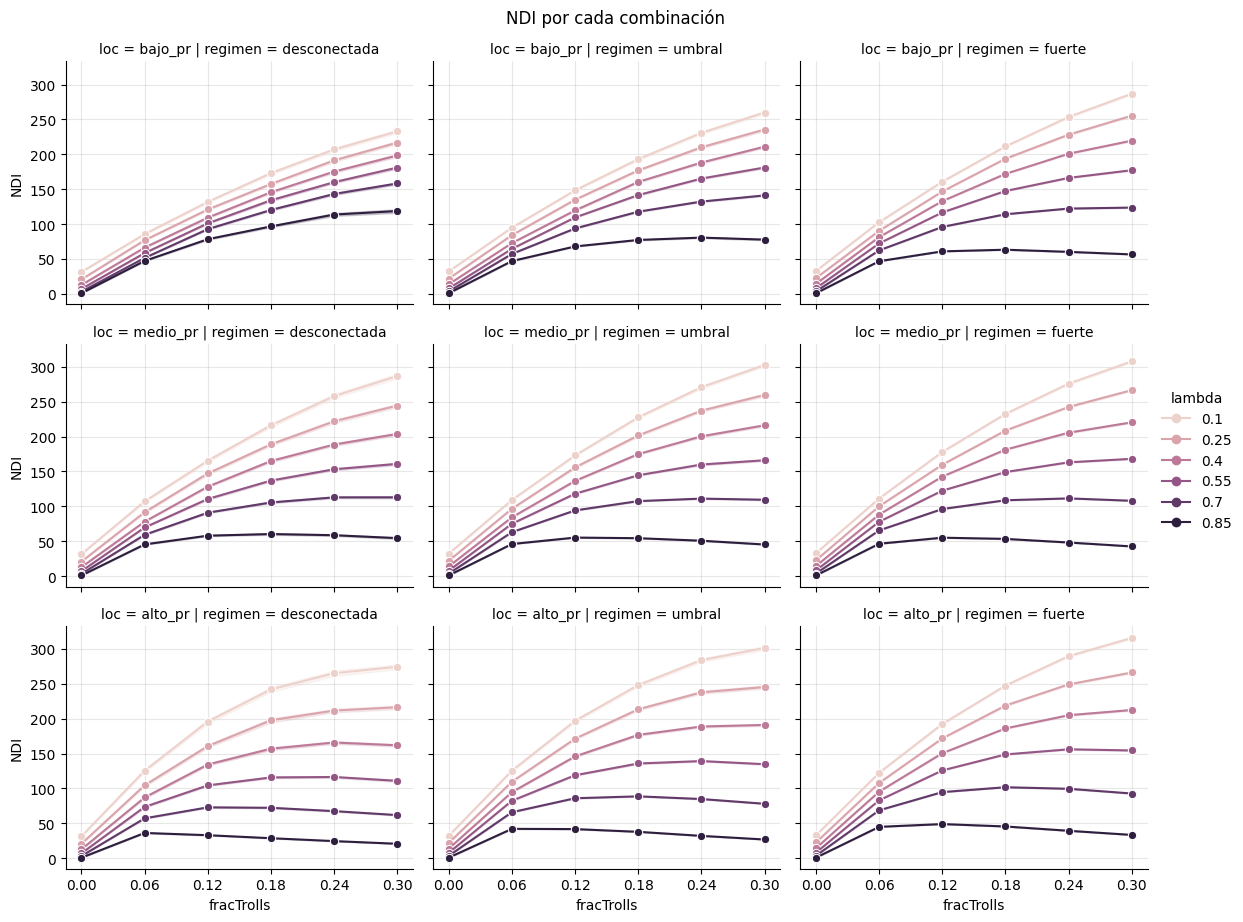

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
g = sns.relplot(
    data=df,
    x="fracTrolls",
    y="NDI",
    col="regimen",
    row="loc",
    hue="lambda",
    kind="line",
    marker="o",
    height=3,
    aspect=1.3
)
xticks = sorted(df["fracTrolls"].unique())

for ax in g.axes.flat:
    ax.set_xticks(xticks)
    ax.grid(True, which="major", axis="both", alpha=0.3)
    ax.set_axisbelow(True)
plt.suptitle("NDI por cada combinación", y=1.02)
plt.show()


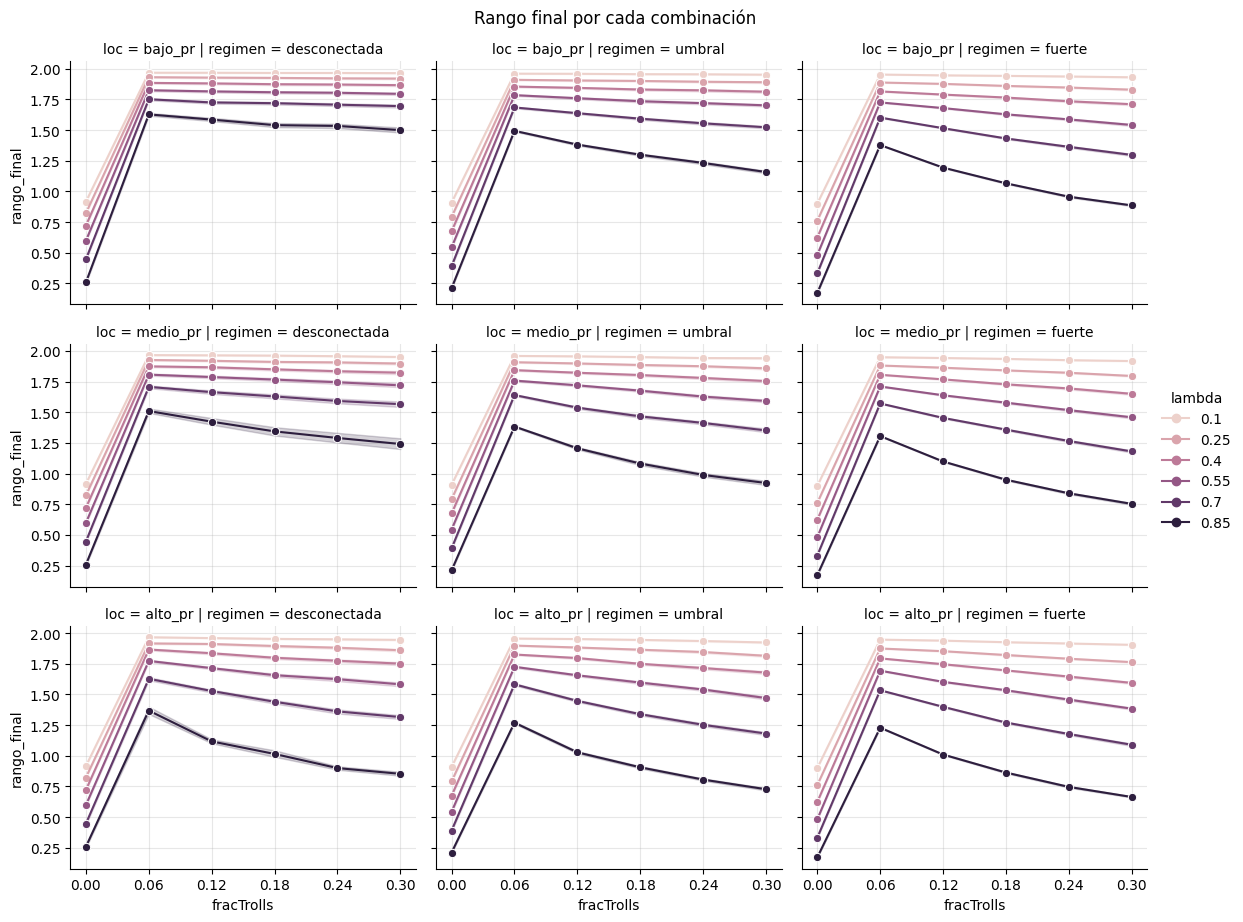

In [52]:
g= sns.relplot(
    data=df,
    x="fracTrolls",
    y="rango_final",
    col="regimen",
    row="loc",
    hue= "lambda",
    kind="line",
    marker= "o",
    height=3,
    aspect=1.3
)
xticks = sorted(df["fracTrolls"].unique())

for ax in g.axes.flat:
    ax.set_xticks(xticks)
    ax.grid(True, which="major", axis="both", alpha=0.3)
    ax.set_axisbelow(True)

plt.suptitle("Rango final por cada combinación", y=1.02)
plt.show()


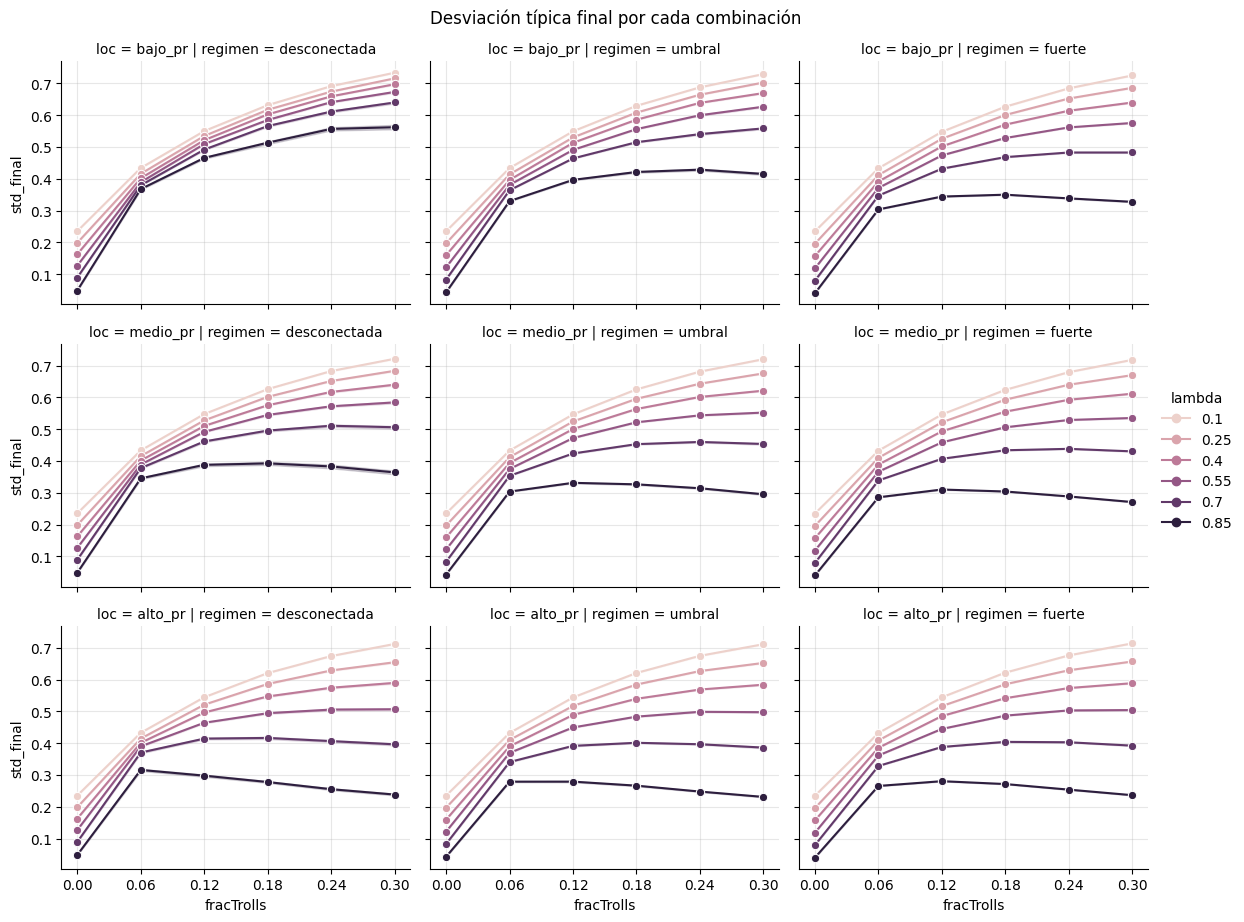

In [54]:
g= sns.relplot(
    data=df,
    x="fracTrolls",
    y="std_final",
    col="regimen",
    row="loc",
    hue= "lambda",
    kind="line",
    marker= "o",
    height=3,
    aspect=1.3
)
xticks = sorted(df["fracTrolls"].unique())

for ax in g.axes.flat:
    ax.set_xticks(xticks)
    ax.grid(True, which="major", axis="both", alpha=0.3)
    ax.set_axisbelow(True)

plt.suptitle("Desviación típica final por cada combinación", y=1.02)
plt.show()

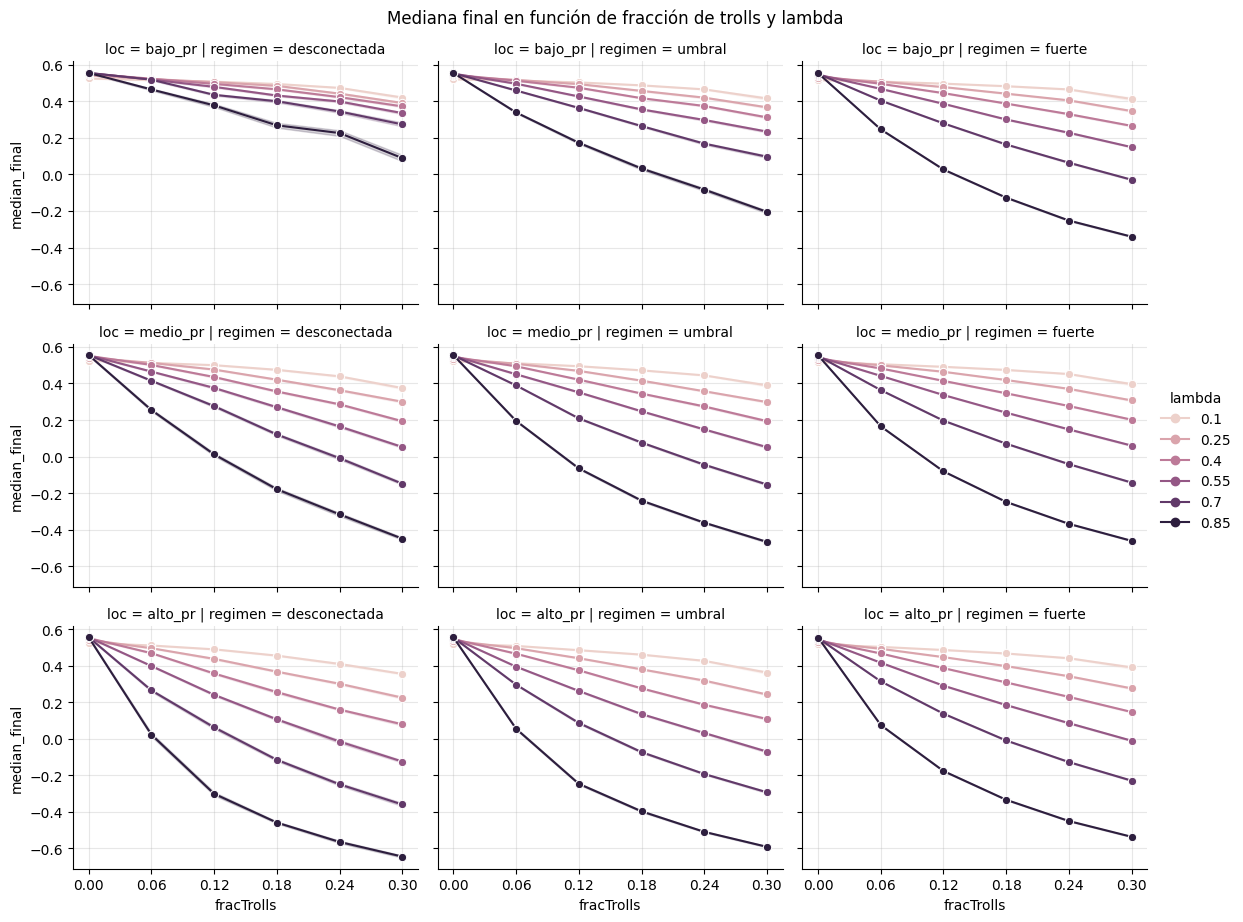

In [56]:
g= sns.relplot(
    data=df,
    x="fracTrolls",
    y="median_final",
    col="regimen",
    row="loc",
    hue= "lambda",
    kind="line",
    marker= "o",
    height=3,
    aspect=1.3
)
xticks = sorted(df["fracTrolls"].unique())

for ax in g.axes.flat:
    ax.set_xticks(xticks)
    ax.grid(True, which="major", axis="both", alpha=0.3)
    ax.set_axisbelow(True)

plt.suptitle("Mediana final en función de fracción de trolls y lambda", y=1.02)
plt.show()

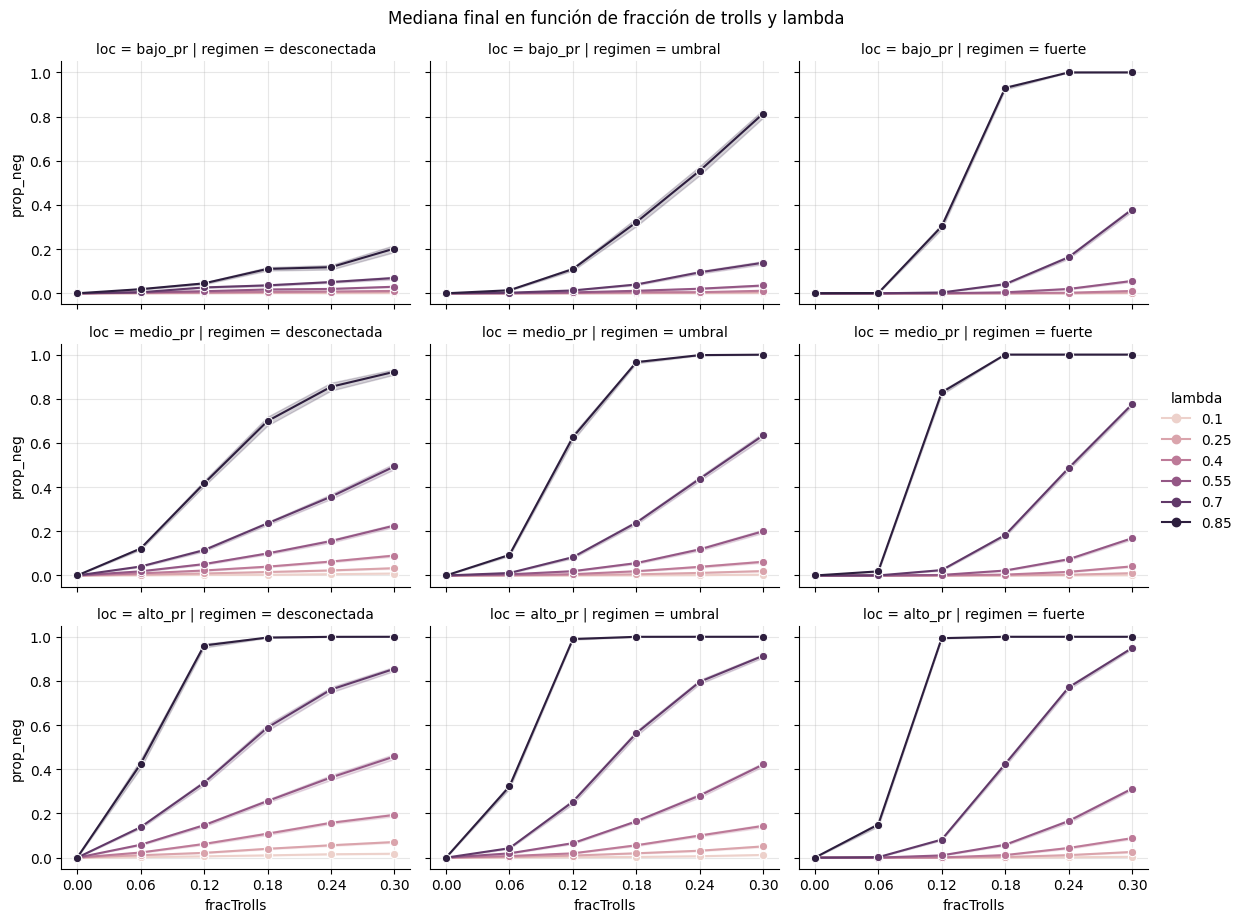

In [58]:
g= sns.relplot(
    data=df,
    x="fracTrolls",
    y="prop_neg",
    col="regimen",
    row="loc",
    hue= "lambda",
    kind="line",
    marker= "o",
    height=3,
    aspect=1.3
)
xticks = sorted(df["fracTrolls"].unique())

for ax in g.axes.flat:
    ax.set_xticks(xticks)
    ax.grid(True, which="major", axis="both", alpha=0.3)
    ax.set_axisbelow(True)

plt.suptitle("Mediana final en función de fracción de trolls y lambda", y=1.02)
plt.show()

modelos

In [60]:
import statsmodels.formula.api as smf
import pandas as pd



# Convertir categóricas correctamente
df["regimen"] = df["regimen"].astype("category")
df["loc"] = df["loc"].astype("category")
df = df.rename(columns={"lambda": "lam"})

# Modelo general para NDI
model_NDI = smf.ols(
    "NDI ~ fracTrolls + lam + C(regimen) + C(loc)", data=df
).fit()

print(model_NDI.summary())


                            OLS Regression Results                            
Dep. Variable:                    NDI   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 1.187e+04
Date:                Sun, 21 Dec 2025   Prob (F-statistic):               0.00
Time:                        21:43:16   Log-Likelihood:                -79963.
No. Observations:               16200   AIC:                         1.599e+05
Df Residuals:                   16193   BIC:                         1.600e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              114.0561 

In [65]:
model_var = smf.ols("std_final ~ fracTrolls + lam + C(regimen) + C(loc)", data=df).fit()
model_rango = smf.ols("rango_final ~ fracTrolls + lam + C(regimen) + C(loc)", data=df).fit()
model_median = smf.ols("median_final ~ fracTrolls + lam + C(regimen) + C(loc)", data=df).fit()
model_mean = smf.ols("mean_final ~ fracTrolls + lam + C(regimen) + C(loc)", data=df).fit()
prop_neg_model = smf.ols("prop_neg ~ fracTrolls + lam + C(regimen) + C(loc)", data=df).fit()
model_median_norm = smf.ols("median_norm ~ fracTrolls + lam + C(regimen) + C(loc)", data=df).fit()


In [66]:
print(model_var.summary())
print(model_mean.summary())
print(model_median.summary())
print(model_rango.summary())
print(prop_neg_model.summary())
print(model_median_norm.summary())

                            OLS Regression Results                            
Dep. Variable:              std_final   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     9996.
Date:                Sun, 21 Dec 2025   Prob (F-statistic):               0.00
Time:                        22:26:26   Log-Likelihood:                 17639.
No. Observations:               16200   AIC:                        -3.526e+04
Df Residuals:                   16193   BIC:                        -3.521e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3907 